In [3]:
import numpy as np
from functools import reduce
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (10,5.5)
import re
from os import system, listdir, popen
from time import sleep
import csv
from collections import Counter
from pathlib import Path
import random
import requests
import csv
from io import StringIO
from tqdm import tqdm
import os 

### Task 1

In [36]:
matrix = np.random.randint(0,10,size=(10000, 10000))

In [6]:
def count(list_, a=0, b=5):
    in_range = np.logical_and(list_>=a, list_<b)
    count = np.sum(in_range) 
    return count

def reduce_(a,b):
    return a+b

In [38]:
start = time.time()
part_count = list(map(count, matrix))
result = reduce(reduce_, part_count)
end = time.time()
t = end-start
print('Number of items in the range [0,5]: ', result)
print('Time: ',t)

Number of items in the range [0,5]:  49993598
Time:  1.1009654998779297


In [39]:
start2 = time.time()
if __name__ ==  '__main__': 
    num_processors = 4
    p=Pool(processes = num_processors)
    output1 = p.map(count, matrix)
    output2 = reduce(reduce_, output1)
end2 = time.time()
t2 = end2-start2
print('Number of items in the range [0,5]: ',output2)
print('Multiprocessing time: ',t2)

Number of items in the range [0,5]:  49993598
Multiprocessing time:  6.841177463531494


### Task 2 

In [42]:
GUTENBERG_CSV_URL = "https://www.gutenberg.org/cache/epub/feeds/pg_catalog.csv.gz"
GUTENBERG_TEXT = "PROJECT GUTENBERG EBOOK "
GUTENBERG_TEXT_URL = "https://www.gutenberg.org/ebooks/{id}.txt.utf-8"
GUTENBERG_ROBOT_URL = "http://www.gutenberg.org/robot/harvest?filetypes[]=txt"


def strip_headers(text):
    in_text = False
    output = []
    
    for line in text.splitlines():        
        if GUTENBERG_TEXT in line:
            if not in_text:
                in_text = True
            else:
                break
        else:
            if in_text:
                output.append(line)

    return "\n".join(output).strip()

def book_text(book_id):
    r = requests.get(GUTENBERG_TEXT_URL.format(id=book_id))
    text = r.text
    clean_text = strip_headers(text)
    return clean_text

In [45]:
sample_nr = 100
r = requests.get(GUTENBERG_CSV_URL)
csv_text = r.content.decode("utf-8")

all_wodehouse_books = [book for book in csv.DictReader(StringIO(csv_text)) 
                    if book['Authors'] != ""
                    and book['Language'] == 'en'
                    and book['Title'] != 'No title'
                    and book['Type'] == 'Text']

wodehouse_books = random.sample(all_wodehouse_books, sample_nr)

In [46]:
data_path = Path("data")
data_path.mkdir(exist_ok=True)

for book in tqdm(wodehouse_books, total=len(wodehouse_books)):
    id = book["Text#"]
    text = book_text(id)
    print(f"Saving {book['Title']} by {book['Authors']} containing {len(text):_} characters")
    if os.path.exists(data_path / (id + ".txt")):
        print(f"File {id}.txt already exists")
        continue
    with open(data_path / (id + ".txt"), "wt") as f:
        f.write(text)

with open(data_path / 'metadata.csv', 'wt') as f:
    csv_writer = csv.DictWriter(f, fieldnames=wodehouse_books[0].keys())
    csv_writer.writeheader()
    for book in wodehouse_books:
        csv_writer.writerow(book)

  1%|          | 1/100 [00:01<02:25,  1.47s/it]

Saving Margery (Gred): A Tale Of Old Nuremberg — Volume 06 by Ebers, Georg, 1837-1898; Bell, Clara, 1834-1927 [Translator] containing 102_482 characters


  2%|▏         | 2/100 [00:03<02:36,  1.59s/it]

Saving Two Poets by Balzac, Honoré de, 1799-1850; Marriage, Ellen, 1865-1946 [Translator] containing 315_505 characters


  3%|▎         | 3/100 [00:04<02:15,  1.40s/it]

Saving Coal and Candlelight, and Other Verses by Eden, Helen Parry, 1885-1960 containing 42_991 characters


  4%|▍         | 4/100 [00:06<02:45,  1.72s/it]

Saving Illumination and Its Development in the Present Day by Farnsworth, Sidney, 1886-1926 containing 313_758 characters


  5%|▌         | 5/100 [00:10<03:57,  2.50s/it]

Saving A system of practical medicine. By American authors. Vol. 4 by Pepper, William, 1843-1898 [Editor]; Starr, Louis, 1849-1925 [Editor] containing 2_808_131 characters


  6%|▌         | 6/100 [00:12<03:37,  2.31s/it]

Saving Memoirs of General William T. Sherman — Volume 2 by Sherman, William T. (William Tecumseh), 1820-1891 containing 1_005_142 characters


  7%|▋         | 7/100 [00:14<03:40,  2.37s/it]

Saving Old Celtic Romances by Joyce, P. W. (Patrick Weston), 1827-1914 [Translator] containing 691_888 characters


  8%|▊         | 8/100 [00:16<03:17,  2.15s/it]

Saving After the Rain : how the West lost the East by Vaknin, Samuel, 1961-; Rangelovska, Lidija [Editor] containing 530_791 characters


  9%|▉         | 9/100 [00:18<03:00,  1.98s/it]

Saving Quinquepedalian by Anthony, Piers, 1934-; Finlay, Virgil, 1914-1971 [Illustrator] containing 37_192 characters


 10%|█         | 10/100 [00:19<02:40,  1.78s/it]

Saving Cargo to Callisto by Bixby, Jerome, 1923-1998; Mayan, Earl, 1916-2009 [Illustrator] containing 29_972 characters


 11%|█         | 11/100 [00:20<02:28,  1.66s/it]

Saving Gypsy Coppersmiths in Liverpool and Birkenhead by Macfie, R. A. Scott (Robert Andrew Scott), 1868-1935 containing 74_941 characters


 12%|█▏        | 12/100 [00:23<02:58,  2.03s/it]

Saving The Memoirs of Charles-Lewis, Baron de Pollnitz, Volume II
Being the Observations He Made in His Late Travels from Prussia Thro' Germany, Italy, France, Flanders, Holland, England, &c. in Letters to His Friend. Discovering Not Only the Present State of the Chief Cities and Towns; but the Characters of the Principal Persons at the Several Courts. by Pöllnitz, Karl Ludwig, Freiherr von, 1692-1775 containing 909_297 characters


 13%|█▎        | 13/100 [00:25<03:01,  2.08s/it]

Saving The Rainbow Trail by Grey, Zane, 1872-1939 containing 538_768 characters


 14%|█▍        | 14/100 [00:27<02:41,  1.88s/it]

Saving Raemaekers' Cartoon History of the War, Volume 2
The Second Twelve Months of War by Raemaekers, Louis, 1869-1956 [Illustrator]; Allison, James Murray, 1877-1929 [Editor] containing 90_701 characters


 15%|█▌        | 15/100 [00:28<02:33,  1.81s/it]

Saving The Tale of Turkey Proudfoot
Slumber-Town Tales by Bailey, Arthur Scott, 1877-1949; Smith, Harry L. [Illustrator] containing 78_112 characters


 16%|█▌        | 16/100 [00:30<02:30,  1.79s/it]

Saving The Black Star: A School Story for Boys by Walpole, Andrew H. containing 268_181 characters


 17%|█▋        | 17/100 [00:32<02:30,  1.81s/it]

Saving Hildreth's "Japan as It Was and Is": A Handbook of Old Japan, Volume 1 (of 2) by Hildreth, Richard, 1807-1865; Griffis, William Elliot, 1843-1928 [Author of introduction, etc.]; Clement, Ernest W. (Ernest Wilson), 1860-1941 [Editor] containing 777_748 characters


 18%|█▊        | 18/100 [00:34<02:24,  1.77s/it]

Saving Hertfordshire by Lydekker, Richard, 1849-1915 containing 219_220 characters


 19%|█▉        | 19/100 [00:35<02:18,  1.71s/it]

Saving Ingersoll in Canada: A Reply to Wendling, Archbishop Lynch, Bystander; and Others by Pringle, Allen containing 151_609 characters


 20%|██        | 20/100 [00:37<02:17,  1.72s/it]

Saving The Complete Works of Artemus Ward — Part 1: Essays, Sketches, and Letters by Ward, Artemus, 1834-1867 containing 327_510 characters


 21%|██        | 21/100 [00:38<02:00,  1.52s/it]

Saving Geographic Range of the Hooded Skunk, Mephitis macroura
With Description of a New Subspecies from Mexico by Hall, E. Raymond (Eugene Raymond), 1902-1986; Dalquest, Walter Woelber, 1917-2000 containing 10_422 characters


 22%|██▏       | 22/100 [00:40<02:03,  1.59s/it]

Saving Anna Seward, and Classic Lichfield by Martin, Stapleton, 1846-1922 containing 63_524 characters


 23%|██▎       | 23/100 [00:42<02:11,  1.71s/it]

Saving The Deep Sea Hunters: Adventures on a Whaler by Verrill, A. Hyatt (Alpheus Hyatt), 1871-1954 containing 252_756 characters


 24%|██▍       | 24/100 [00:44<02:21,  1.86s/it]

Saving The Morals of Marcus Ordeyne : a Novel by Locke, William John, 1863-1930 containing 473_710 characters


 25%|██▌       | 25/100 [00:46<02:22,  1.91s/it]

Saving The Shaving of Shagpat; an Arabian entertainment — Volume 1 by Meredith, George, 1828-1909 containing 173_324 characters


 26%|██▌       | 26/100 [00:48<02:28,  2.01s/it]

Saving Paris under the Commune
The Seventy-Three Days of the Second Siege; with Numerous Illustrations, Sketches Taken on the Spot, and Portraits (from the Original Photographs) by Leighton, John, 1822-1912 containing 774_536 characters


 27%|██▋       | 27/100 [00:50<02:24,  1.98s/it]

Saving The History of England from the First Invasion by the Romans to the Accession of King George the Fifth. Volume 08 of 11. by Lingard, John, 1771-1851; Belloc, Hilaire, 1870-1953 containing 1_275_752 characters


 28%|██▊       | 28/100 [00:53<02:43,  2.27s/it]

Saving Zachariah Chandler: An Outline Sketch of His Life and Public Services by Post and Tribune Company (Detroit, Mich.) [Publisher]; Blaine, James Gillespie, 1830-1893 [Author of introduction, etc.] containing 905_534 characters


 29%|██▉       | 29/100 [00:56<02:48,  2.38s/it]

Saving The Philippine Islands, 1493-1898; Volume 50
Explorations by early navigators, descriptions of the islands and their peoples, their history and records of the catholic missions, as related in contemporaneous books and manuscripts, showing the political, economic, commercial and religious conditions of those islands from their earliest relations with European nations to the close of the nineteenth century by Blair, Emma Helen, 1851-1911 [Editor]; Bourne, Edward Gaylord, 1860-1908 [Contributor]; Robertson, James Alexander, 1873-1939 [Editor] containing 553_315 characters


 30%|███       | 30/100 [00:58<02:32,  2.18s/it]

Saving The Solution of the Pyramid Problem; or, Pyramid Discoveries
With a New Theory as to their Ancient Use by Ballard, Robert, 1839-1912 containing 135_781 characters


 31%|███       | 31/100 [01:00<02:36,  2.27s/it]

Saving The Way to the West, and the Lives of Three Early Americans: Boone—Crockett—Carson by Hough, Emerson, 1857-1923; Remington, Frederic, 1861-1909 [Illustrator] containing 605_261 characters


 32%|███▏      | 32/100 [01:02<02:27,  2.17s/it]

Saving The island pirate, a tale of the Mississippi by Reid, Mayne, 1818-1883 containing 209_384 characters


 33%|███▎      | 33/100 [01:04<02:24,  2.16s/it]

Saving Stained Glass of the Middle Ages in England and France by Arnold, Hugh; Saint, Lawrence B. (Lawrence Bradford), 1885- [Illustrator] containing 297_248 characters


 34%|███▍      | 34/100 [01:05<02:06,  1.91s/it]

Saving Paul Clifford — Volume 03 by Lytton, Edward Bulwer Lytton, Baron, 1803-1873 containing 115_742 characters


 35%|███▌      | 35/100 [01:07<01:57,  1.81s/it]

Saving The Adventures of Herr Baby by Molesworth, Mrs., 1839-1921; Crane, Walter, 1845-1915 [Illustrator] containing 205_721 characters


 36%|███▌      | 36/100 [01:09<01:49,  1.72s/it]

Saving Green Bays.  Verses and Parodies by Quiller-Couch, Arthur, 1863-1944 containing 50_052 characters


 37%|███▋      | 37/100 [01:10<01:48,  1.73s/it]

Saving Wisconsin in Story and Song;
Selections from the Prose and Poetry of Badger State Writers by Rounds, Charles Ralph, 1877- [Editor]; Hippensteel, Henry Sherman [Editor] containing 495_617 characters


 38%|███▊      | 38/100 [01:13<01:57,  1.89s/it]

Saving Suzanna Stirs the Fire by Blake, Emily Calvin, 1882- containing 390_438 characters


 39%|███▉      | 39/100 [01:14<01:54,  1.88s/it]

Saving The Romance of Zion Chapel [3d ed.] by Le Gallienne, Richard, 1866-1947 containing 256_715 characters


 40%|████      | 40/100 [01:16<01:45,  1.76s/it]

Saving Aaron Trow by Trollope, Anthony, 1815-1882 containing 63_800 characters


 41%|████      | 41/100 [01:17<01:38,  1.66s/it]

Saving Old Mr. Wiley by La Spina, Greye, 1880-1969 containing 37_701 characters


 42%|████▏     | 42/100 [01:20<01:48,  1.87s/it]

Saving The Grey Friars in Oxford by Little, A. G. (Andrew George), 1863-1945 containing 1_029_236 characters


 43%|████▎     | 43/100 [01:21<01:40,  1.77s/it]

Saving Golden Stars in Tatting and Crochet by Riego de la Branchardière, Eléonore containing 32_276 characters


 44%|████▍     | 44/100 [01:23<01:40,  1.80s/it]

Saving A Catalogue of Books Published by Methuen and Company, February, 1908 by Methuen & Co. containing 157_547 characters


 45%|████▌     | 45/100 [01:25<01:37,  1.77s/it]

Saving Songs of Labor and Reform
Part 5 From Volume III of The Works of John Greenleaf Whittier by Whittier, John Greenleaf, 1807-1892 containing 105_718 characters


 46%|████▌     | 46/100 [01:27<01:46,  1.97s/it]

Saving The Jew, The Gypsy and El Islam by Burton, Richard Francis, Sir, 1821-1890; Wilkins, W. H. (William Henry), 1860-1905 [Editor] containing 520_881 characters


 47%|████▋     | 47/100 [01:29<01:41,  1.91s/it]

Saving The Sin and Danger of Self-Love
Described by a Sermon Preached At Plymouth, in New-England, 1621 by Cushman, Robert, 1579?-1625 containing 71_047 characters


 48%|████▊     | 48/100 [01:30<01:28,  1.69s/it]

Saving Black Eyes and the Daily Grind by Marlowe, Stephen, 1928-2008 containing 29_748 characters


 49%|████▉     | 49/100 [01:32<01:22,  1.61s/it]

Saving Is the Bible Indictable?
Being an Enquiry whether the Bible Comes within the Ruling of the Lord Chief Justice as to Obscene Literature by Besant, Annie, 1847-1933 containing 31_515 characters


 50%|█████     | 50/100 [01:34<01:33,  1.87s/it]

Saving The Helmet of Navarre by Runkle, Bertha, 1879-1958; Castaigne, J. André, 1861-1929 [Illustrator] containing 593_596 characters


 51%|█████     | 51/100 [01:35<01:24,  1.72s/it]

Saving The Story of Scraggles by James, George Wharton, 1858-1923; Gallagher, Sears, 1869-1955 [Illustrator] containing 68_404 characters


 52%|█████▏    | 52/100 [01:37<01:15,  1.57s/it]

Saving The Breadth, Freeness, and Yet Exclusiveness of the Gospel by Hoare, Edward, 1812-1894 containing 19_763 characters


 53%|█████▎    | 53/100 [01:39<01:28,  1.88s/it]

Saving The Blazed Trail by White, Stewart Edward, 1873-1946 containing 631_527 characters


 54%|█████▍    | 54/100 [01:41<01:24,  1.84s/it]

Saving Best o' luck: How a fighting Kentuckian won the thanks of Britain's King by McClintock, Alexander, 1893-1918 containing 148_044 characters


 55%|█████▌    | 55/100 [01:43<01:26,  1.92s/it]

Saving Century of Light by Bahá'í International Community containing 331_319 characters


 56%|█████▌    | 56/100 [01:45<01:26,  1.96s/it]

Saving The Life of Col. James Gardiner
Who Was Slain at the Battle of Prestonpans, September 21, 1745 by Doddridge, Philip, 1702-1751 containing 273_964 characters


 57%|█████▋    | 57/100 [01:48<01:34,  2.19s/it]

Saving Kalevala : the Epic Poem of Finland — Complete by Lönnrot, Elias, 1802-1884 [Compiler]; Crawford, John Martin, 1845-1916 [Translator] containing 816_724 characters


 58%|█████▊    | 58/100 [01:50<01:30,  2.15s/it]

Saving A Canyon Voyage
The Narrative of the Second Powell Expedition down the Green-Colorado River from Wyoming, and the Explorations on Land, in the Years 1871 and 1872 by Dellenbaugh, Frederick Samuel, 1853-1935 containing 648_899 characters


 59%|█████▉    | 59/100 [01:52<01:23,  2.03s/it]

Saving The Carved Lions by Molesworth, Mrs., 1839-1921; Brooke, L. Leslie (Leonard Leslie), 1862-1940 [Illustrator] containing 264_247 characters


 60%|██████    | 60/100 [01:53<01:13,  1.85s/it]

Saving The Life of Buddha and Its Lessons by Olcott, Henry Steel, 1832-1907 containing 22_446 characters


 61%|██████    | 61/100 [01:55<01:12,  1.87s/it]

Saving The New South: A Chronicle of Social and Industrial Evolution by Thompson, Holland, 1873-1940 containing 319_227 characters


 62%|██████▏   | 62/100 [01:57<01:13,  1.93s/it]

Saving Stories from the Odyssey by Havell, H. L. (Herbert Lord), -1913; Homer, 751? BCE-651? BCE containing 371_845 characters


 63%|██████▎   | 63/100 [02:00<01:18,  2.12s/it]

Saving Christ: The Way, the Truth, and the Life by Brown, John, 1610?-1679 containing 676_375 characters


 64%|██████▍   | 64/100 [02:01<01:12,  2.02s/it]

Saving A Dome of Many-Coloured Glass by Lowell, Amy, 1874-1925 containing 92_258 characters


 65%|██████▌   | 65/100 [02:03<01:02,  1.77s/it]

Saving Comments on the Taxonomic Status of Apodemus peninsulae, with Description of a New Subspecies from North China by Jones, J. Knox, 1929-1992 containing 20_668 characters


 66%|██████▌   | 66/100 [02:04<00:55,  1.65s/it]

Saving Reasons Against the Succession of the House of Hanover
With an Enquiry How Far the Abdication of King James, Supposing It to Be Legal, Ought to Affect the Person of the Pretender by Defoe, Daniel, 1661?-1731 containing 55_535 characters


 67%|██████▋   | 67/100 [02:05<00:51,  1.56s/it]

Saving Punch, or the London Charivari, Vol. 108, March 30th 1895 by Various; Burnand, F. C. (Francis Cowley), 1836-1917 [Editor] containing 54_804 characters


 68%|██████▊   | 68/100 [02:07<00:49,  1.55s/it]

Saving The Churches of Coventry: A Short History of the City & Its Medieval Remains by Woodhouse, Frederic W. containing 162_999 characters


 69%|██████▉   | 69/100 [02:09<00:50,  1.63s/it]

Saving Poor Blossom: The Story of a Horse by Carrington, Edith, 1853-1929 containing 122_259 characters


 70%|███████   | 70/100 [02:11<00:57,  1.92s/it]

Saving Anecdotal Recollections of the Congress of Vienna by La Garde-Chambonas, Auguste Louis Charles, Comte de, 1783-1853?; Fleury, Maurice, comte, 1856-1921 [Editor]; Vandam, Albert D. (Albert Dresden), 1843-1903 [Translator] containing 851_460 characters


 71%|███████   | 71/100 [02:13<00:52,  1.80s/it]

Saving Treatment of hemorrhoids, and other non-malignant rectal diseases by Agnew, W. P. (William Penn), 1851?-1931 containing 127_153 characters


 72%|███████▏  | 72/100 [02:15<00:55,  1.99s/it]

Saving The Rise of the Dutch Republic — Complete (1574-84) by Motley, John Lothrop, 1814-1877 containing 1_176_906 characters


 73%|███████▎  | 73/100 [02:17<00:49,  1.83s/it]

Saving Personal Memoirs of P. H. Sheridan, Volume 2, Part 4 by Sheridan, Philip Henry, 1831-1888 containing 155_741 characters


 74%|███████▍  | 74/100 [02:19<00:51,  1.99s/it]

Saving Middy and Ensign by Fenn, George Manville, 1831-1909; Rowlandson, G. D. [Illustrator] containing 791_434 characters


 75%|███████▌  | 75/100 [02:21<00:48,  1.94s/it]

Saving Gypsy and Ginger by Farjeon, Eleanor, 1881-1965 containing 128_382 characters


 76%|███████▌  | 76/100 [02:23<00:47,  1.98s/it]

Saving Mrs. Vanderstein's jewels by Bryce, Charles, Mrs. containing 583_222 characters


 77%|███████▋  | 77/100 [02:25<00:47,  2.07s/it]

Saving A Short History of Freethought Ancient and Modern, Volume 1 of 2
Third edition, Revised and Expanded, in two volumes by Robertson, J. M. (John Mackinnon), 1856-1933 containing 1_448_443 characters


 78%|███████▊  | 78/100 [02:29<00:58,  2.64s/it]

Saving History of Gujarát
Gazetteer of the Bombay Presidency, Volume I, Part I. by Campbell, James M., 1846-1903 containing 1_946_652 characters


 79%|███████▉  | 79/100 [02:31<00:50,  2.41s/it]

Saving Abraham Lincoln's Cardinal Traits;
A Study in Ethics, with an Epilogue Addressed to Theologians by Beardslee, Clark S. (Clark Smith), 1850-1914 containing 426_892 characters


 80%|████████  | 80/100 [02:33<00:42,  2.11s/it]

Saving Cinq Mars — Volume 3 by Vigny, Alfred de, 1797-1863 containing 119_268 characters


 81%|████████  | 81/100 [02:34<00:35,  1.87s/it]

Saving Punch, or the London Charivari, Volume 101, October 10, 1891 by Various containing 53_686 characters


 82%|████████▏ | 82/100 [02:35<00:31,  1.78s/it]

Saving The Pedler of Dust Sticks by Follen, Eliza Lee Cabot, 1787-1860 containing 61_877 characters


 83%|████████▎ | 83/100 [02:37<00:30,  1.79s/it]

Saving Boys' Second Book of Inventions by Baker, Ray Stannard, 1870-1946 containing 244_674 characters


 84%|████████▍ | 84/100 [02:39<00:27,  1.75s/it]

Saving Matthew on Money by Keister, Lawrence containing 21_585 characters


 85%|████████▌ | 85/100 [02:40<00:24,  1.65s/it]

Saving Nets to Catch the Wind by Wylie, Elinor, 1885-1928 containing 23_594 characters


 86%|████████▌ | 86/100 [02:42<00:23,  1.71s/it]

Saving Fort Pulaski National Monument, Georgia by Lattimore, Ralston B. containing 97_063 characters


 87%|████████▋ | 87/100 [02:44<00:21,  1.69s/it]

Saving Revolt of the Outworlds by Marlowe, Stephen, 1928-2008; Terry, W. E., 1921-1992 [Illustrator] containing 108_613 characters


 88%|████████▊ | 88/100 [02:45<00:19,  1.64s/it]

Saving The Kitchen Encyclopedia
Twelfth Edition (Swift & Company) by Anonymous containing 57_599 characters


 89%|████████▉ | 89/100 [02:47<00:17,  1.59s/it]

Saving A West Country Pilgrimage by Phillpotts, Eden, 1862-1960; Benthall, Annie T. [Illustrator] containing 104_407 characters


 90%|█████████ | 90/100 [02:50<00:20,  2.00s/it]

Saving History of Julius Cæsar, Vol. 1 of 2 by Napoleon III, Emperor of the French, 1808-1873 containing 848_410 characters


 91%|█████████ | 91/100 [02:52<00:17,  1.96s/it]

Saving Scottish Ghost Stories by O'Donnell, Elliott, 1872-1965 containing 269_770 characters


 92%|█████████▏| 92/100 [02:54<00:17,  2.15s/it]

Saving A Narrative of the Shipwreck, Captivity and Sufferings of Horace Holden and Benj. H. Nute
Who were cast away in the American ship Mentor, on the Pelew Islands, in the year 1832; and for two years afterwards were subjected to unheard of sufferings among the barbarous inhabitants of Lord North's island by Holden, Horace, 1810- containing 143_981 characters


 93%|█████████▎| 93/100 [02:55<00:12,  1.83s/it]

Saving The Beasts in the Void by Fairman, Paul W., 1909-1977; Terry, W. E., 1921-1992 [Illustrator] containing 36_307 characters


 94%|█████████▍| 94/100 [02:56<00:09,  1.61s/it]

Saving We're Civilized! by Clifton, Mark, 1906-1963; Apostolides, Alex, 1923-2005 containing 24_748 characters


 95%|█████████▌| 95/100 [02:57<00:07,  1.44s/it]

Saving The Mentor: Game Birds of America, Vol. 1, Num. 34, Serial No. 34 by Forbush, Edward Howe, 1858-1929 containing 41_445 characters


 96%|█████████▌| 96/100 [02:58<00:05,  1.33s/it]

Saving A Sermon, Delivered Before His Excellency Edward Everett, Governor, His Honor George Hull, Lieutenant Governor, the Honorable Council, and the Legislature of Massachusetts, on the Anniversary Election, January 2, 1839 by Hopkins, Mark, 1802-1887 containing 46_918 characters


 97%|█████████▋| 97/100 [03:00<00:04,  1.37s/it]

Saving The Flower of the Flock, Volume 1 (of 3) by Egan, Pierce, 1772-1849 containing 441_961 characters


 98%|█████████▊| 98/100 [03:01<00:02,  1.36s/it]

Saving Rachel: A Play in Three Acts by Grimké, Angelina Weld, 1880-1958 containing 153_155 characters


 99%|█████████▉| 99/100 [03:02<00:01,  1.30s/it]

Saving The School for Husbands by Molière, 1622-1673 containing 77_638 characters


100%|██████████| 100/100 [03:04<00:00,  1.84s/it]

Saving The Early Introduction of Bogus Freemasonry in the United States of America and Texas Among Colored Masons by Mitchell, C. L. (Charles L.) containing 117_072 characters


In [6]:
text_list = ["book1.txt","book2.txt","book3.txt"]

In [9]:
from urllib.request import urlopen

In [10]:
def download_url(urlpath):
    try:
        # open a connection to the server
        with urlopen(urlpath, timeout=3) as connection:
            # read the contents of the url as bytes and return it
            return connection.read()
    except:
        return None

In [8]:
def mapp(book):
    words_list = []
    with open(book,'r',encoding='utf-8') as text:
        for line in text:
            for word in line.split():
                words_list.append(word)   
    count = Counter(words_list)
    return count

def redu(dict1,dict2):
    return {k: dict1.get(k, 0) + dict2.get(k, 0) for k in set(dict1) | set(dict2)}
    

In [9]:
# !wget -w 2 -m http://www.gutenberg.org/robot/harvest?filetypes[]=txt&langs[]=en

In [10]:
import os
import time

text_list = ["data/"+i for i in os.listdir("data")]
start3 = time.time()
count_w = list(map(mapp,text_list))
result_c = reduce(redu, count_w)
end3 = time.time()
t3 = end3-start3
print('t: ', t3)

t:  36.43622922897339


In [57]:
start4 = time.time()
if __name__ ==  '__main__':
    p=Pool(8)
    output_map = p.map(mapp,[i for i in text_list])
    output2 = reduce(redu,output_map)
t4 = time.time() - start4

print('Multiprocessing time: ',t4)

Multiprocessing time:  26.619986534118652


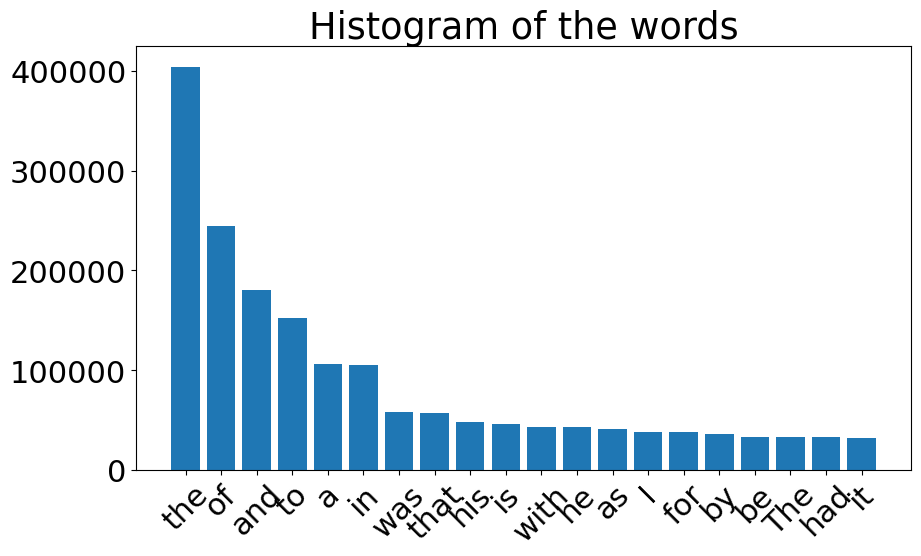

In [58]:
sorted_ = sorted(result_c.items(),key=lambda x: x[1], reverse= True)[:20]
a = []
b = []
for x, y in sorted_:
    a.append(x)
    b.append(y)
plt.bar(a,b)
plt.xticks(rotation = 45)
plt.title('Histogram of the words')
plt.show()

### Task 3

In [11]:
from decimal import Decimal
from decimal import getcontext

def pi_map(k):
    # getcontext().prec=10000
    return (1/Decimal(16)**k)*(Decimal(4)/(8*k+1) -Decimal(2)/(8*k+4) - Decimal(1)/(8*k+5) - Decimal(1)/(8*k+6))
def pi_map(k):
    return (1/Decimal(16)**k)*(Decimal(4)/(8*k+1) -Decimal(2)/(8*k+4) - Decimal(1)/(8*k+5) - Decimal(1)/(8*k+6))

In [ ]:
decimals =10000
getcontext().prec = decimals

In [28]:
k = np.arange(decimals)
start5 = time.time()
part_count2 = list(map(pi_map,k))
resultss = reduce(reduce_, part_count2)
end5 = time.time()
t5 = end5-start5
print('Pi value: ', resultss)
print('Time: ', t5)

Pi value:  3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195

In [29]:
k = np.arange(decimals)
start6 = time.time()
if __name__ ==  '__main__': 
    p=Pool(processes = 4)
    output6 = p.map(pi_map,[i for i in k])
    output7 = reduce(reduce_,output6)
end6 = time.time()
t6 = end6-start6
print('Pi value: ',output7)
print('Multiprocessing time: ', t6)

Pi value:  3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195

In [30]:
getcontext().prec = 8

### Task 4

In [60]:
import numpy as np
from collections import defaultdict

# Input matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
A, B

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [72]:
def decomposition(M1, M2):
    dec_M1 = []
    dec_M2 = []
    for i in range(M1.shape[0]):
        for j in range(M1.shape[1]):
            dec_M1.append(('A', i, j, M1[i,j], M2.shape[1], M2.shape[0]))

    for i in range(M2.shape[0]):
        for j in range(M2.shape[1]):
            dec_M2.append(('B', i, j, M2[i,j], M1.shape[0], M1.shape[1]))

    return dec_M1 + dec_M2

def mapper(value):
    # value is a ("A",i,j,a_ij,m,n) or ("B",j,k,b_jk,p,n)
    result = []
    if value[0] == 'A':
        i = value[1]
        j = value[2]
        a_ij = value[3]
        p = value[4]
        for k in range(p):
            result.append(((i, k), ('A', j, a_ij)))
    else:
        j = value[1]
        k = value[2]
        b_jk = value[3]
        m = value[4]
        for i in range(m):
            result.append(((i, k), ('B', j, b_jk)))
    return result

def reducer(key, values):
    # key is (i,k)
    # values is a list of ("A",j,a_ij) and ("B",j,b_jk)
    print(values)
    hash_A = {value[1]: value[2] for value in values if value[0] == 'A'}
    hash_B = {value[1]: value[2] for value in values if value[0] == 'B'}
    result = 0
    for j in hash_A:
        if j in hash_B:
            result += hash_A[j] * hash_B[j]
    return (key, result)


In [62]:
dec = decomposition(A, B)
dec

[('A', 0, 0, 1, 2, 2),
 ('A', 0, 1, 2, 2, 2),
 ('A', 1, 0, 3, 2, 2),
 ('A', 1, 1, 4, 2, 2),
 ('B', 0, 0, 5, 2, 2),
 ('B', 0, 1, 6, 2, 2),
 ('B', 1, 0, 7, 2, 2),
 ('B', 1, 1, 8, 2, 2)]

In [65]:
map_result = list(map(mapper, dec))
map_result = [x for sublist in map_result for x in sublist]
map_result

[((0, 0), ('A', 0, 1)),
 ((0, 1), ('A', 0, 1)),
 ((0, 0), ('A', 1, 2)),
 ((0, 1), ('A', 1, 2)),
 ((1, 0), ('A', 0, 3)),
 ((1, 1), ('A', 0, 3)),
 ((1, 0), ('A', 1, 4)),
 ((1, 1), ('A', 1, 4)),
 ((0, 0), ('B', 0, 5)),
 ((1, 0), ('B', 0, 5)),
 ((0, 1), ('B', 0, 6)),
 ((1, 1), ('B', 0, 6)),
 ((0, 0), ('B', 1, 7)),
 ((1, 0), ('B', 1, 7)),
 ((0, 1), ('B', 1, 8)),
 ((1, 1), ('B', 1, 8))]

In [75]:
intermediate = defaultdict(list)
for key, value in map_result:
    intermediate[key].append(value)

final_result = [reducer(key, values) for key, values in intermediate.items()]
final_result 

[('A', 0, 1), ('A', 1, 2), ('B', 0, 5), ('B', 1, 7)]
[('A', 0, 1), ('A', 1, 2), ('B', 0, 6), ('B', 1, 8)]
[('A', 0, 3), ('A', 1, 4), ('B', 0, 5), ('B', 1, 7)]
[('A', 0, 3), ('A', 1, 4), ('B', 0, 6), ('B', 1, 8)]


[((0, 0), 19), ((0, 1), 22), ((1, 0), 43), ((1, 1), 50)]

In [59]:
n, m = A.shape[0], B.shape[1]
result_matrix = np.zeros((n, m))
for (i, k), value in final_result:
    result_matrix[i, k] = value

print("Resulting Matrix C:")
print(result_matrix)

Resulting Matrix C:
[[19. 22.]
 [43. 50.]]
